In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import scipy.signal as signal

In [35]:
def calculate_kernal_applied(in_matrix_1, in_matrix_2):
    mult = np.multiply(in_matrix_1, in_matrix_2)
    sum = np.sum(mult)
    out = sum/(in_matrix_2.shape[0]*in_matrix_2.shape[1])
    return out

def convolve(im, kernal):
    kernal_center_i = math.floor(kernal.shape[0]/2)
    kernal_center_j = math.floor(kernal.shape[1]/2)
    out_im = np.ones(im.shape)

    for m in range(kernal_center_i, im.shape[0] - kernal_center_i):
        for n in range(kernal_center_j, im.shape[1] - kernal_center_j):
            out_im[m][n] = calculate_kernal_applied(im[m-kernal_center_i:m+kernal_center_i+1, n-kernal_center_j:n+kernal_center_j+1], kernal)
    
    return out_im
            

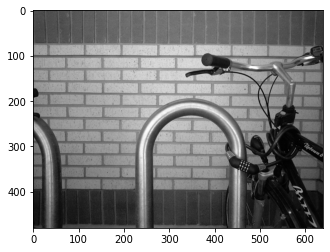

In [51]:
im = cv2.imread('filter.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(im, cmap='gray')

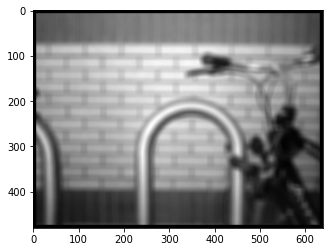

In [52]:

lin_filter = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
])

lin_filter_2 = np.ones(shape=(15,15), dtype=int)

out_im = convolve(im, lin_filter_2)
plt.imshow(out_im, cmap='gray')

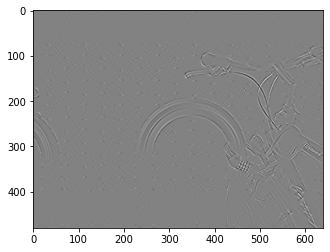

In [63]:
sobel_x_operator = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_operator = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

x_out_im = convolve(im, sobel_x_operator)
out_im = convolve(x_out_im, sobel_y_operator)
# out_im = 255 - out_im
plt.imshow(out_im, cmap='gray')

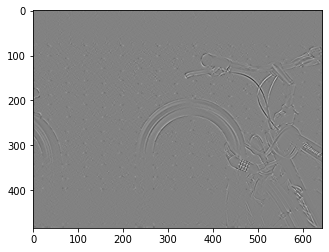

In [64]:
out = signal.convolve2d(im, sobel_x_operator)
out = signal.convolve2d(out, sobel_y_operator)
# out = np.convolve(out, sobel_y_operator)
plt.imshow(out, cmap='gray')